In [1]:
import requests
import io
import zipfile
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip'
r = requests.get(url,auth=('user','pass'))
mlz = zipfile.ZipFile(io.BytesIO(r.content))
mlz.namelist()

['HTRU_2.csv', 'HTRU_2.arff', 'Readme.txt']

In [14]:
import pandas as pd
data = pd.read_csv(mlz.open('HTRU_2.csv'))
X, y =data.iloc[:,:-1].values, data.iloc[:,-1].values


In [4]:
from sklearn.cluster import MiniBatchKMeans
batch_size=3000
mbk = MiniBatchKMeans(init='k-means++', n_clusters=2, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)

In [6]:
mbk.fit(X)
y_pred=mbk.predict(X)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)#Covering ~ 95% variance
X=pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print('Total variance covered: ',sum(pca.explained_variance_ratio_))

[ 0.87105737  0.07819042  0.04115499  0.00615969  0.00243716]
Total variance covered:  0.998999634715


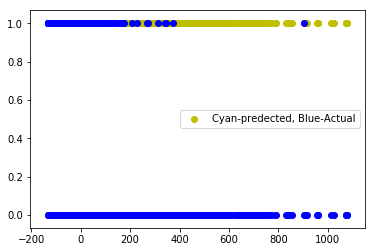

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X,y_pred,color='y')
plt.scatter(X,y,color='b')
plt.legend(['Cyan-predicted, Blue-Actual'])
plt.show()